# Modules

In [3]:
from PIL import Image as img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import random
import math
# import tensorflow.keras


# PIL Image

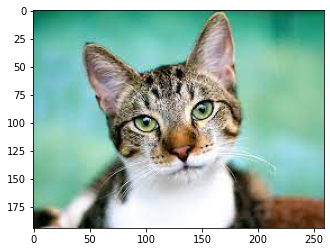

In [525]:
file_name = "cat.jpg"
cat = img.open(file_name)
# cat.show()
cat = np.array(cat)
plt.imshow(cat)

In [ ]:
cat

In [ ]:
print(cat.height,cat.width)

In [ ]:
cat = cat.resize((64,64))
cat

In [ ]:
cat.resize((150,50))

# Numpy & Matplotlib

In [ ]:
a = np.arange(1,10,2)
a = np.linspace(1,5,20)
np.sum(a)

In [ ]:
cat_np = np.array(cat)
cat_np.shape

In [ ]:
# len(cat_np)
cat_np.ndim

In [ ]:
cat_np.size

In [ ]:
cat_np[0][0]

In [ ]:
# cat_np
cat_np.ravel()

In [ ]:
# plt.plot(np.arange(cat_np.size),cat_np.ravel())

# CSV & Pandas

In [390]:
fname = "test.csv"
with open(fname) as f:
    txt = f.read()
print(txt,type(txt))

1,2,3,4,
5,6,7,8, <class 'str'>


# Numpy read write to csv file

In [409]:
# np.savetxt('asd.csv',x,delimiter=',')
data = np.genfromtxt(fname,delimiter=',')
data
# print(data,data.dtype,data.shape)
data = data + 10
np.savetxt(fname,data,delimiter=',')
data

array([[81., 82., 83., 84.],
       [85., 86., 87., 88.]])

In [355]:
data = pd.read_csv(fname)
data

1  2  3  4
0  5  6  7  8

# Processing raw_data

## Resizing & Renaming all raw images

In [512]:
gun_names = glob.glob("raw_data\*.jpeg")
gun_names += glob.glob("raw_data\*.jpg")
# print(len(gun_names))
# print(len(gun_names))
# print(gun_names)m
height=width=150
i=0
for gun in gun_names[:]:
    gun_img = img.open(gun)
    # plt.imshow(gun_img)
    if gun_img.height>=height and gun_img.width>=width:
        gun_img.resize((width,height)).save("data\\gun"+str(i)+".jpg")
        i+=1
# len()
# os.unlink(gun_names[0])

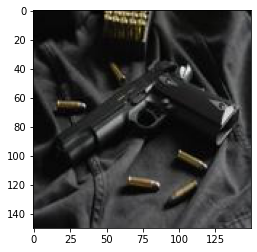

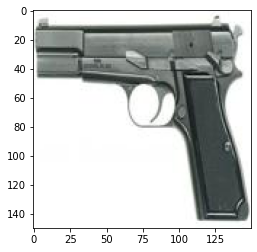

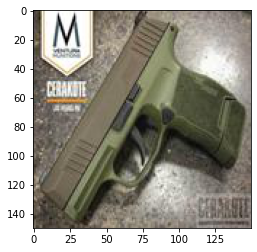

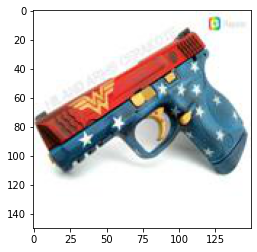

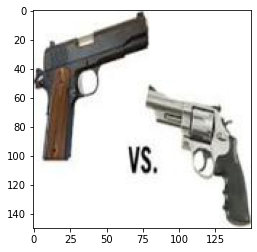

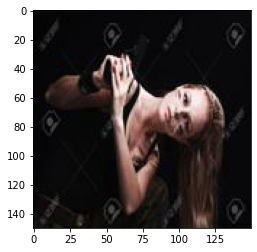

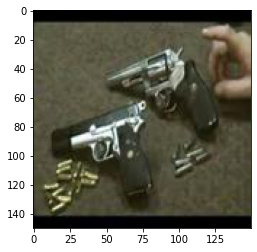

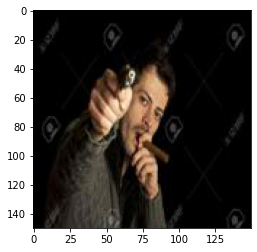

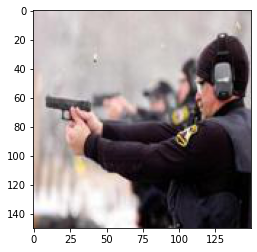

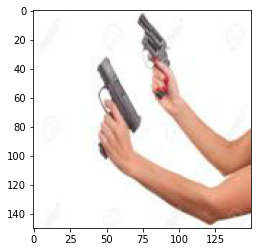

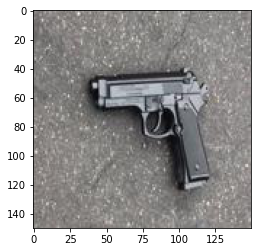

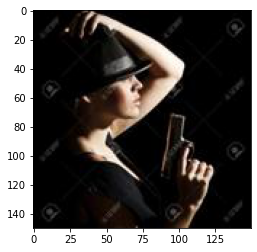

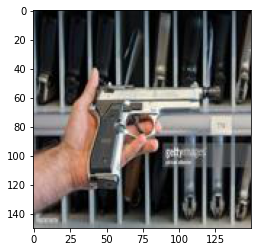

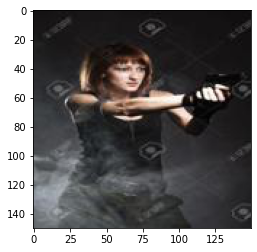

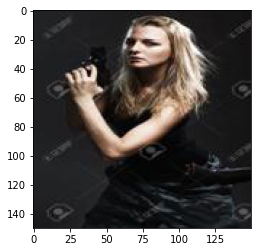

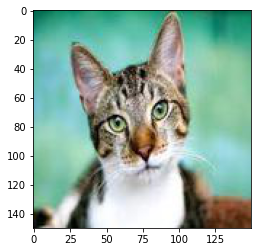

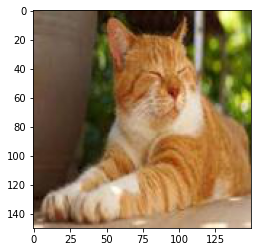

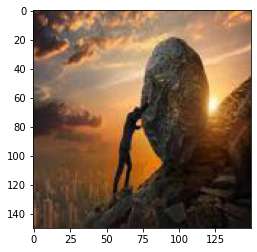

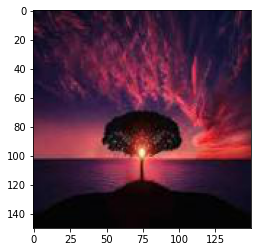

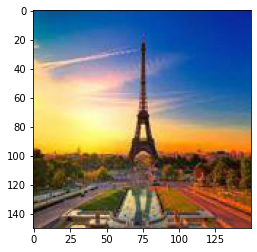

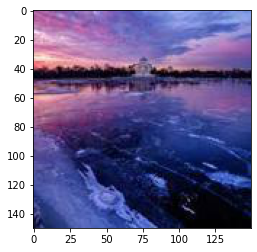

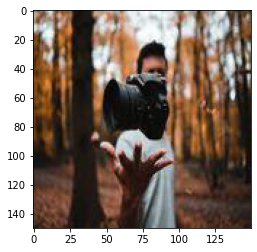

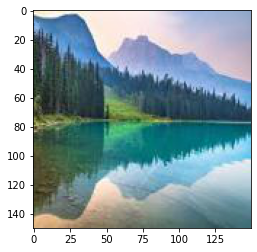

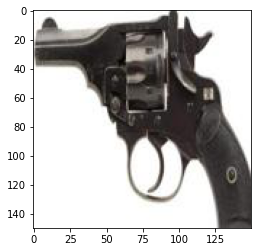

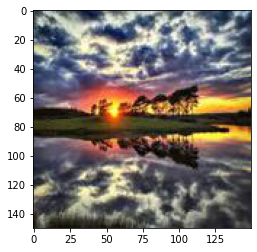

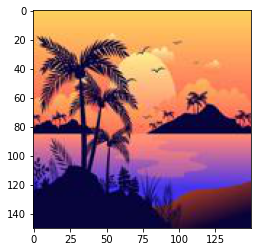

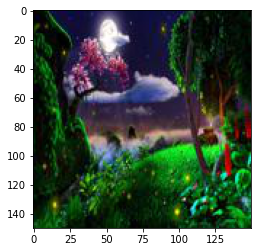

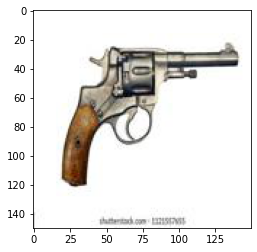

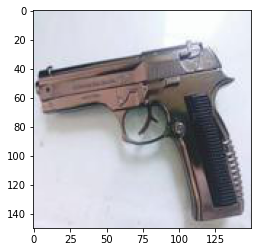

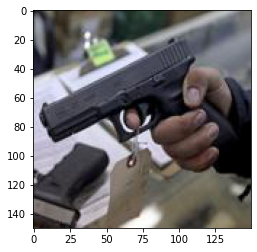

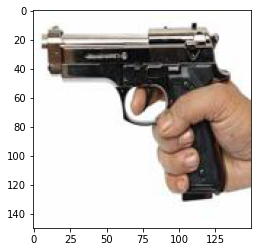

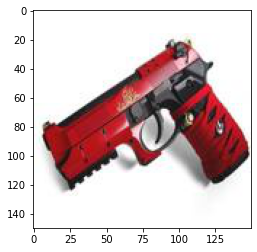

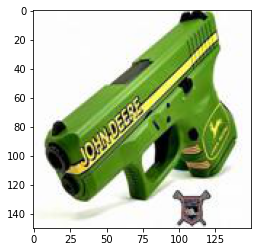

(33, 1, 67500) (33,)


In [513]:
gun_names = glob.glob("data\*.jpg")
# print(gun_names)
all_data_x=[]
all_data_y=[]
n = height*width*3
# random.shuffle(gun_names)
for name in gun_names:
    gun = img.open(name)
    plt.imshow(gun)
    plt.show()
    gun = np.array(gun).reshape(1,n)
    all_data_y+=[int(input("Is this a Gun(0 or 1)? "))]
    all_data_x.append(gun)
all_data_x = np.array(all_data_x)
all_data_y = np.array(all_data_y)
m = len(all_data_y)
print(all_data_x.shape,all_data_y.shape)
ALL_X = all_data_x
# print(all_data_x[:20])

In [514]:
all_data_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

## Saving gun data to csv file

In [517]:
# all_data_x.reshape(10,)
gdname = 'gundatay.csv'
# ttt = np.hstack((all_data_x.reshape(m,n)/255,all_data_y.reshape(m,1)))
np.savetxt(gdname,all_data_y.reshape(1,m),delimiter=',')
# .shape

In [518]:
data = np.genfromtxt(gdname,delimiter=',')
adata

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [471]:
tmp = data[:5,:10]
tmp

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [209., 198., 202., 211., 200., 204., 213., 202., 206., 216.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [132., 128., 127., 158., 154., 153., 137., 133., 132., 133.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [510]:
np.random.shuffle(tmp)
tmp

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255.],
       [209., 198., 202., 211., 200., 204., 213., 202., 206., 216.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [132., 128., 127., 158., 154., 153., 137., 133., 132., 133.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255.]])

# Extracting data for Model

In [641]:
gun_names = glob.glob("data\*.jpg")
all_data_x=[]
for name in gun_names:
    gun = img.open(name)
    gun = np.array(gun).reshape(1,gun.width*gun.height*3)
    all_data_x.append(gun)
all_data_x = np.array(all_data_x)

all_data_y = np.genfromtxt('gundatay.csv',delimiter=',')
m = len(all_data_y)
n = all_data_x.shape[2]
print(all_data_x.shape,all_data_y.shape,m,n)



(33, 1, 67500) (33,) 33 67500


In [642]:
all_data_x = all_data_x.reshape(m,n).transpose()
all_data_y = all_data_y.reshape(1,m)
print(all_data_x.shape,all_data_y.shape)
# all_data_x

(67500, 33) (1, 33)


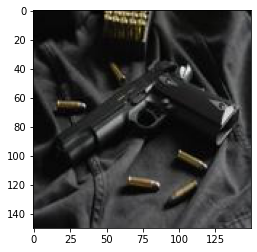

In [643]:
plt.imshow(all_data_x[:,0].reshape(width,height,3))

## Shuffling data

In [644]:
all_data = np.vstack((all_data_x,all_data_y)).transpose()
np.random.shuffle(all_data)
all_data = all_data.transpose()
all_data.shape

(67501, 33)

## Dividing to training and test data

In [559]:
no_train = int(m*0.70)
no_test = m - no_train
print(no_train,no_test)

23 10


In [561]:
train_x = all_data_x[:,:no_train]
test_x = all_data_x[:,no_train:]
train_y = all_data_y[:,:no_train]
test_y = all_data_y[:,no_train:]
print(train_x.shape,test_x.shape)
print(train_y.shape,test_y.shape)
# print(train_x.shape)


(67500, 23) (67500, 10)
(1, 23) (1, 10)


## Sigmoid Function

In [680]:
def g(z):
    return 1/(1+np.exp(-z))
# g(10)

## Cost Function

In [681]:
def J(g,y):
    # print("===>>",g)
    g[g<=0]=0.000000001
    g[g>=1]=0.999999999
    return ((y @ np.log(g).transpose()+(1-y) @ np.log(1-g).transpose())/(-len(y)))[0,0]
# print(g,y)
# print(np.sum((y*np.log(g))#,(1-y)*np.log(1-g))))
# J(np.linspace(0.001,0.999,5).reshape(5,1),np.linspace(0.001,0.999,5).reshape(5,1))

## Gradient Descent

(67501, 33) (1, 33) (67501, 1) alpha = 100000000000000
22.649072889381966
<ipython-input-680-ea8a5bdd328b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


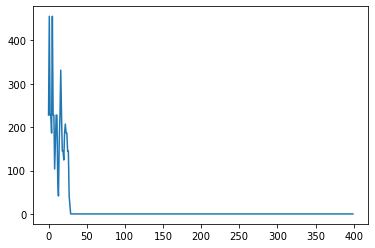

3.2999999083196265e-08
<ipython-input-680-ea8a5bdd328b>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


'Alpha VS Cost'

In [690]:
def gd(theta,x,y,alpha=0.007,itr=5000,graph=False):
    if graph:
        cost = []
        for i in range(itr):
            theta = theta - (x @ (g(theta.transpose() @ x)-y).transpose() * alpha/y.size)
            cost += [J(g(theta.transpose()@x),y)]
        # plt.open
        plt.close()
        plt.plot(np.arange(itr),cost)
        plt.show()
    else:
        for i in range(itr):
            theta = theta - x @ (g(theta.transpose() @ x)-y).transpose() * alpha/y.size
    return theta

l=0
r=5
# n=30
# m=50
# n = n+1 #"""for bias term 1 added to n"""
# theta = np.zeros((n,1))+0.000001
# # x = np.random.randint(l,r,(n,m))/r
# # y = np.random.randint(0,2,(1,m))
# y = (all_data[-1:,:]).copy()
# xx = (all_data[:-1,:]/255).copy()
# x = np.vstack((xx,np.ones((1,m)))) #"""adding 1 as bias unit to all m-training set"""
# ==============================================================
theta = np.zeros((n,1))+0.000001
th = theta
# print(theta)
alpha = 100000000000000
print(x.shape,y.shape,theta.shape,'alpha =',alpha)
print(J(g(theta.transpose() @ x),y))
theta = gd(theta,x,y,alpha,400,graph=1)
print(J(g(theta.transpose() @ x),y))
# print(g(theta.transpose() @ x))




In [645]:
n = n+1 #"""for bias term 1 added to n"""
theta = np.zeros((n,1))+0.000001
# x = np.random.randint(l,r,(n,m))/r
# y = np.random.randint(0,2,(1,m))
y = (all_data[-1:,:]).copy()
xx = (all_data[:-1,:]/255).copy()
x = np.vstack((xx,np.ones((1,m)))) #"""adding 1 as bias unit to all m-training set"""

In [ ]:

"""Alpha VS Cost"""
# alpha = np.linspace(0.001,100,20)
# cost = []
# for a in alpha:
#     theta = th
#     theta = gd(theta,x,y,a,400)
#     # print(theta,end=',')
#     cost += [J(g(theta.transpose() @ x),y)]
# # print(cost)
# plt.close()
# plt.plot(alpha,cost,'r.-')
# plt.show()


## Testing model

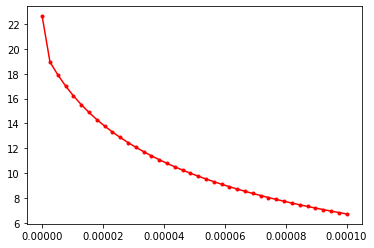

[66.66666666666667, 66.66666666666667, 66.66666666666667, 69.6969696969697, 78.78787878787878, 81.81818181818181, 84.84848484848484, 84.84848484848484, 87.87878787878788, 90.9090909090909, 90.9090909090909, 90.9090909090909, 90.9090909090909, 93.93939393939394, 93.93939393939394, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 96.96969696969697, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [711]:
def predict(x,theta):
    predict_y = g(theta.T @ x)
    predict_y[predict_y>=0.5]=1
    predict_y[predict_y<0.5]=0
    # print(predict_y==y)
    return len(predict_y[predict_y==y])

# ========================================================
th = theta = np.zeros((n,1))+0.000001
# alpha = 10
# print(x.shape,y.shape,theta.shape,'alpha =',alpha)
# print(J(g(theta.transpose() @ x),y))
# theta = gd(theta,x,y,alpha,400,graph=0)
# print(J(g(theta.transpose() @ x),y))



"""Alpha VS Accuracy"""
alpha = np.linspace(0.000000001,0.0001,40)
acc = []
cost = []
for a in alpha:
    theta = th
    theta = gd(theta,x,y,a,400)
    # print(theta,end=',')
    acc += [(predict(x,theta)*100/m)]
    cost += [J(g(theta.T @ x),y)]
# print(cost)
plt.close()
plt.plot(alpha,cost,'r.-')
plt.show()
print(acc)


# (predict(x,theta)*100/m)

In [ ]:
if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

In [215]:
import numpy as np
np.random.seed(0)

prob = np.random.randint(5, size=4) /4
print(prob)

result = np.where(prob > 0.0000000001, prob, -10)
# print(result)
np.log10(result, out=result, where=result > 0)
print(result)

[1.   0.   0.75 0.75]
[  0.         -10.          -0.12493874  -0.12493874]


In [109]:
np.random.random((3,5))
0 * sum(3 + 0 * np.log([0,1,3]))

<ipython-input-109-647344c4ed54>:2: RuntimeWarning: divide by zero encountered in log
  0 * sum(3 + 0 * np.log([0,1,3]))
<ipython-input-109-647344c4ed54>:2: RuntimeWarning: invalid value encountered in multiply
  0 * sum(3 + 0 * np.log([0,1,3]))


nan

In [ ]:
np.log(a)
a.transpose()
a= np.linspace(2,5,20).reshape(20,1)

In [679]:
ab = np.vstack(([100,-200],[3,4]))
na = p.ones()(2,2)
a
b= a.co#py()
b[]1=50,1
ab)(nJ(g)),a

===>> [[1.00000000e+00 1.38389653e-87]
 [9.52574127e-01 9.82013790e-01]]
<ipython-input-664-1a142870b813>:5: RuntimeWarning: divide by zero encountered in log
  return ((y @ np.log(g).transpose()+(1-y) @ np.log(1-g).transpose())/(-len(y)))[0,0]
<ipython-input-664-1a142870b813>:5: RuntimeWarning: invalid value encountered in matmul
  return ((y @ np.log(g).transpose()+(1-y) @ np.log(1-g).transpose())/(-len(y)))[0,0]


nan